In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard.csv")

# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())

(284807, 31)
First 5 lines:
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
describe: 
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.00

Class as pie chart:



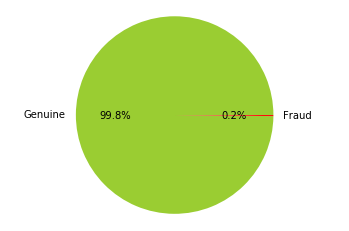

In [3]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')
print()

In [0]:
df = df.drop(['Time'],axis=1)

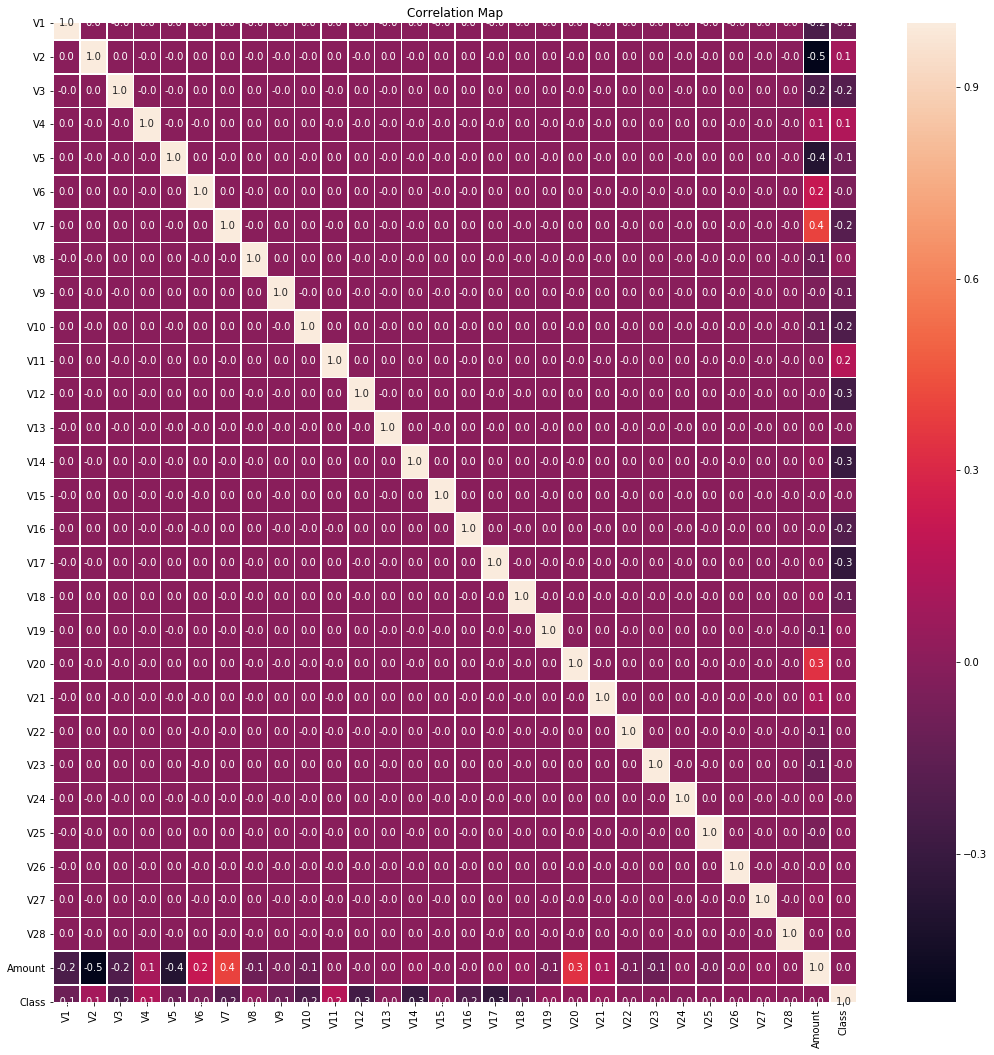

In [5]:
import seaborn as sns
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

No visible correlation of the attributes, let us look at the correlation to the target class instead.

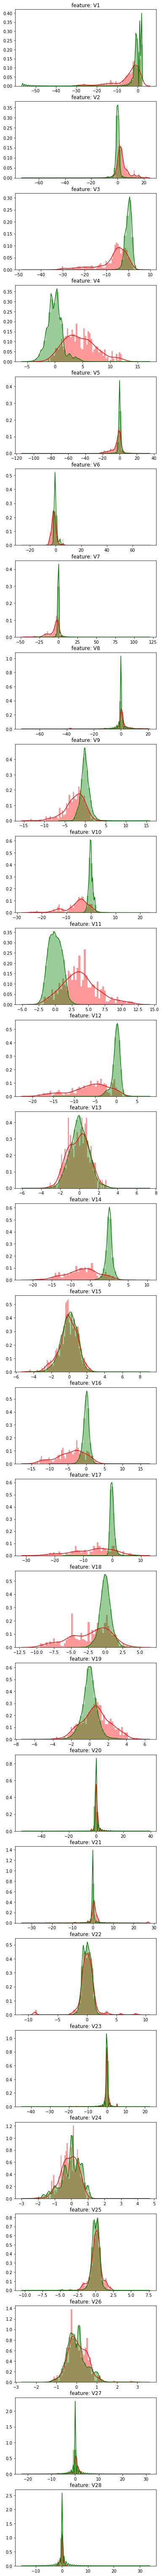

In [6]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [0]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [0]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [0]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [16]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Sensitivity : ', tp/(tp+fn) )
print('Specificity : ', tn/(fp+tn))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[194745   4275]
 [    55    289]]
test-set confusion matrix:
 [[83438  1857]
 [   29   119]]
recall score:  0.8040540540540541
precision score:  0.06022267206477733
f1 score:  0.1120527306967985
accuracy score:  0.9779268050045059
Sensitivity :  0.8040540540540541
Specificity :  0.9782285010844716


In [17]:
# Drop list of attributes that are not correlated with the target as seen in the figure above.

drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Sensitivity : ', tp/(tp+fn) )
print('Specificity : ', tn/(fp+tn))

###Ver
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro','accuracy','f1','roc_auc']
scores = cross_validate(GaussianNB(), df.drop(['Class'], axis=1).values, df['Class'].values, scoring=scoring,cv=5)
print('\n')
scores
import numpy as np

print('Recall Average=',np.mean(scores['test_recall_macro']))
print('Precision Average=',np.mean(scores['test_precision_macro']))
print('Acc Average=',np.mean(scores['test_accuracy']))
print('F1 Average=',np.mean(scores['test_f1']))
print('AUC Average=',np.mean(scores['test_roc_auc']))

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
train-set confusion matrix:
 [[196031   2989]
 [    47    297]]
test-set confusion matrix:
 [[84000  1295]
 [   26   122]]
recall score:  0.8243243243243243
precision score:  0.08609738884968243
f1 score:  0.15591054313099043
accuracy score:  0.9845394005360298
Sensitivity :  0.8243243243243243
Specificity :  0.9848173984407058


Recall Average= 0.9035204080454445
Precision Average= 0.530550648926635
Acc Average= 0.9776971799247365
F1 Average= 0.11425703209571492
AUC Average= 0.9605208093941666


As we can see, the classifier can better predict when only using those attributes that are not dropped from our list.

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

AUC = 0.9828653278973949


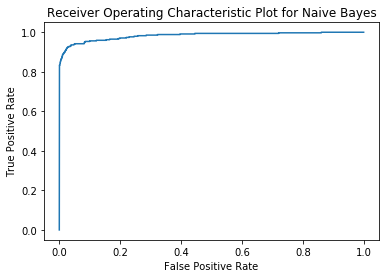

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot for Naive Bayes')
print( 'AUC =', auc(fpr, tpr))

In [20]:
gaus = GaussianNB()
% timeit gaus.fit(X_train,y_train)
classif = gaus.fit(X_train,y_train)
% timeit classif.predict(X_test)

10 loops, best of 3: 75.9 ms per loop
10 loops, best of 3: 27.1 ms per loop


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# range of k we want to try
k_range = range(1,6)
# empty list to store scores
k_scores = []

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree')
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.9992476083978348, 0.9992726878998525, 0.9993228469038877, 0.9992175122154494, 0.9992225283926144]


In [0]:
scoring = ['precision_macro', 'recall_macro','accuracy','f1','roc_auc']
scores = cross_validate(knn,X_train,y_train, cv=5, scoring=scoring)

In [0]:
scores

{'fit_time': array([0.52432656, 0.4039495 , 0.47379112, 0.47463131, 0.34665465]),
 'score_time': array([101.14017653,  91.40019798,  89.43526173,  93.67536831,
         92.36964989]),
 'test_accuracy': array([0.99939809, 0.99919745, 0.99932285, 0.99932285, 0.99937299]),
 'test_f1': array([0.8       , 0.72881356, 0.77310924, 0.77310924, 0.79338843]),
 'test_precision_macro': array([0.97032456, 0.93844907, 0.95971122, 0.95971122, 0.95257905]),
 'test_recall_macro': array([0.8477884 , 0.81151883, 0.83328309, 0.83328309, 0.85287837]),
 'test_roc_auc': array([0.87671329, 0.84763493, 0.88393399, 0.88390796, 0.88963144])}




Cross Vaildation takes a long time (10 minutes) that is why we just looked at the common way of finding the accuracy and plotting them

In [0]:
#import KNeighborsClassifier


#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

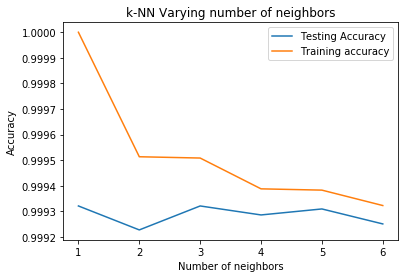

In [23]:
#Generate plot
plt.title('k-NN Varying number of neighbors')

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
knn.score(X_test,y_test)

0.9993211848834895

In [0]:
% timeit knn.fit(X_train,y_train)
% timeit knn.score(X_test,y_test)

1 loop, best of 3: 507 ms per loop
1 loop, best of 3: 45.1 s per loop


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [0]:
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Sensitivity : ', tp/(tp+fn) )
print('Specificity : ', tn/(fp+tn))

[[85285    10]
 [   48   100]]
Sensitivity :  0.6756756756756757
Specificity :  0.9998827598335189


In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.68      0.78       148

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [0]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8978624616700929

AUC = 0.8978624616700929


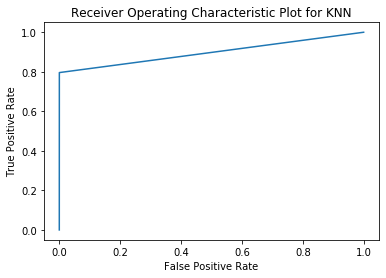

In [0]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot for KNN')
print( 'AUC =', auc(fpr, tpr))

In [0]:
df

Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]

In [0]:
df.shape

(284807, 31)

To test the robustness, we introduce a Gaussian noise factor and add it to our dataset. Here, we do not make any constraints to the mean of this noise, so we simply give it the value 0.5.

In [0]:
mu = 0.5
sigma = 2

noise = np.random.normal(mu,sigma,[284807,29])
robust = df.copy()

In [0]:
robust[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] = robust[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] + noise

In [0]:
robust

Time         V1         V2  ...       V28      Amount  Class
0            0.0   0.395813   0.943597  ... -0.664011  149.382685      0
1            0.0  -0.086971  -1.389886  ... -0.079615    1.319191      0
2            1.0  -0.475631  -0.035128  ... -1.540720  376.545344      0
3            1.0  -0.603820   0.140889  ... -3.026710  123.730938      0
4            2.0  -2.507770   4.134085  ... -0.133268   68.532495      0
...          ...        ...        ...  ...       ...         ...    ...
284802  172786.0 -11.824884  10.230463  ...  0.849213    4.825060      0
284803  172787.0   0.992840  -5.617934  ...  5.564742   27.845981      0
284804  172788.0   1.721780  -4.219006  ...  2.128590   65.672506      0
284805  172788.0  -3.338383  -1.874462  ... -1.546221    9.127987      0
284806  172792.0   2.901032   3.935261  ...  1.346713  215.791810      0

[284807 rows x 31 columns]

In [0]:
drop_list = []
X_train_rob, X_test_rob, y_train_rob, y_test_rob = split_data(robust, drop_list)
y_pred_rob, y_pred_prob_rob = get_predictions(GaussianNB(), X_train_rob, y_train_rob, X_test_rob)
print_scores(y_test_rob,y_pred_rob,y_pred_prob_rob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226600    851]
 [   173    221]]
test-set confusion matrix:
 [[56634   230]
 [   42    56]]
recall score:  0.5714285714285714
precision score:  0.1958041958041958
f1 score:  0.2916666666666667
accuracy score:  0.9952248867666164


In [0]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train_rob2, X_test_rob2, y_train_rob2, y_test_rob2 = split_data(robust, drop_list)
y_pred_rob2, y_pred_prob_rob2 = get_predictions(GaussianNB(), X_train_rob2, y_train_rob2, X_test_rob2)
print_scores(y_test_rob2,y_pred_rob2,y_pred_prob_rob2)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226759    692]
 [   172    222]]
test-set confusion matrix:
 [[56677   187]
 [   42    56]]
recall score:  0.5714285714285714
precision score:  0.23045267489711935
f1 score:  0.32844574780058644
accuracy score:  0.9959797759910115


AUC = 0.9504480878092626


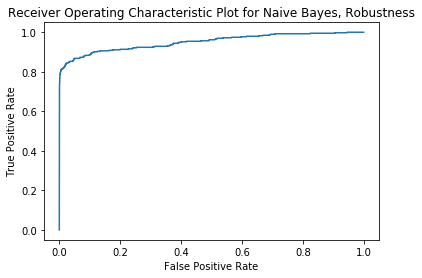

In [0]:
fpr, tpr, thr = roc_curve(y_train_rob2, pipeline.predict_proba(X_train_rob2)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot for Naive Bayes, Robustness')
print( 'AUC =', auc(fpr, tpr))

KD Tree for speed up



In [0]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 